<a href="https://colab.research.google.com/github/pauloedhuardo/pos-mvp/blob/main/MVPsprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objetivo**

Este trabalho tem o objetivo de determinar o nível de estresse (PSS_score) de uma amostra de indivíduos analisando variáveis físicas, fisiológicas e comportamentais em um período de 30 dias.




# **Configurações**

**Configurações iniciais e importações das bibliotecas necessárias**

In [81]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Decisão
from sklearn.svm import SVR # algoritmo SVM
from sklearn.svm import SVC # algoritmo SVC
from sklearn.model_selection import GridSearchCV # para otimização de hiperparâmetros
from sklearn.model_selection import StratifiedKFold # para validação cruzada com estratificação
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

**Carragmento do dataset**

In [82]:
url_dataset = 'https://raw.githubusercontent.com/pauloedhuardo/pos-mvp/main/sprint1/stress_detection.csv'

dataset = pd.read_csv(url_dataset, delimiter=',')

dataset.head()

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132


# **Preparação dos dados**

**Separação dos dados em conjunto de treino e testes e implementação de validação cruzada**

In [83]:
seed = 7 # semente aleatória

# Separação em bases de treino e teste (holdout)
dados = dataset.values
X = dados[:,3:20] # atributos
y = dados[:,2] # classe (target)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7) # faz a divisão

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
scoring='neg_mean_squared_error'
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação


# **Modelagem e Inferência**

**Criação dos modelos e da pipeline**

In [84]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
#models = []
results = []
names = []
pipelines = []

#Algorítmos
reg_lin = ('LR', LinearRegression())
ridge = ('Ridge', Ridge())
lasso = ('Lasso', Lasso())
knn = ('KNN', KNeighborsRegressor())
cart = ('CART', DecisionTreeRegressor())
svr = ('SVR', SVR())

# Preparando os modelos e adicionando-os na pipeline
pipelines.append(('LR', Pipeline([reg_lin])))
pipelines.append(('Ridge',  Pipeline([ridge])))
pipelines.append(('Lasso',  Pipeline([lasso])))
pipelines.append(('KNN',  Pipeline([knn])))
pipelines.append(('CART',  Pipeline([cart])))
pipelines.append(('SVR',  Pipeline([svr])))


**Avaliação dos modelos e transformações de padronização e normalização**





In [85]:
# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler()) # padronização do dataset
min_max_scaler = ('MinMaxScaler', MinMaxScaler()) # normalização do dataset

# Montagem dos pipelines

# Dataset Padronizado
pipelines.append(('LR-padronizado', Pipeline([standard_scaler, reg_lin])))
pipelines.append(('Ridge-padronizado', Pipeline([standard_scaler, ridge])))
pipelines.append(('Lasso-padronizado', Pipeline([standard_scaler, lasso])))
pipelines.append(('KNN-padronizado', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padronizado', Pipeline([standard_scaler, cart])))
pipelines.append(('SVR-padronizado', Pipeline([standard_scaler, svr])))


# Dataset Normalizado
pipelines.append(('LR-normalizado', Pipeline([min_max_scaler, reg_lin])))
pipelines.append(('Ridge-normalizado', Pipeline([min_max_scaler, ridge])))
pipelines.append(('Lasso-normalizado', Pipeline([min_max_scaler, lasso])))
pipelines.append(('KNN-normalizado', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-normalizado', Pipeline([min_max_scaler, cart])))
pipelines.append(('SVR-normalizado', Pipeline([min_max_scaler, svr])))

# Avaliação dos modelos
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  # visualização do MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  res_metrics = "%s: (MSE) %0.2f (%0.2f) - (MSE) %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(res_metrics)

LR: (MSE) 74.76 (1.00) - (MSE) 8.65
Ridge: (MSE) 74.76 (1.00) - (MSE) 8.65
Lasso: (MSE) 74.15 (0.71) - (MSE) 8.61
KNN: (MSE) 87.21 (3.72) - (MSE) 9.34
CART: (MSE) 154.56 (8.45) - (MSE) 12.43
SVR: (MSE) 75.41 (1.70) - (MSE) 8.68
LR-padronizado: (MSE) 74.76 (1.00) - (MSE) 8.65
Ridge-padronizado: (MSE) 74.76 (1.00) - (MSE) 8.65
Lasso-padronizado: (MSE) 74.24 (0.49) - (MSE) 8.62
KNN-padronizado: (MSE) 92.11 (3.25) - (MSE) 9.60
CART-padronizado: (MSE) 152.53 (9.21) - (MSE) 12.35
SVR-padronizado: (MSE) 76.73 (1.70) - (MSE) 8.76
LR-normalizado: (MSE) 74.76 (1.00) - (MSE) 8.65
Ridge-normalizado: (MSE) 74.75 (1.00) - (MSE) 8.65
Lasso-normalizado: (MSE) 74.24 (0.49) - (MSE) 8.62
KNN-normalizado: (MSE) 92.02 (3.66) - (MSE) 9.59
CART-normalizado: (MSE) 155.31 (5.89) - (MSE) 12.46
SVR-normalizado: (MSE) 76.80 (1.79) - (MSE) 8.76


**Gráfico de comparação dos modelos**

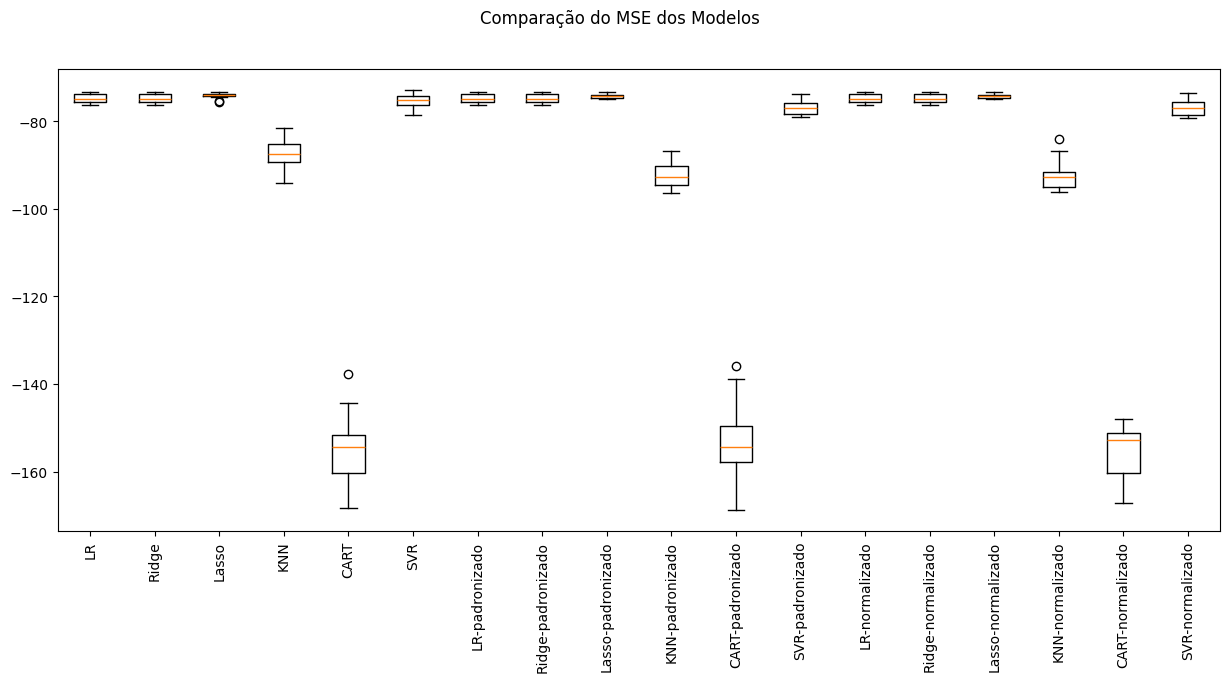

In [65]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,6))
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation = 90)
plt.show()

**Otimização de hiperparâmetros**

Conforme a avaliação utilizando validação cruzada, os modelos que melhor apresentraram o erro quadrático médio (MSE) e raiz do erro quadrático médio (RMSE) foi Regressão linear e os seus métodos de regularização (Ridge e Lasso), com uma pequena vantagem para o modelo Lasso.

Dessa forma, para tentativa de melhorar a precisão do modelo escolhido, foi realizada a otimização dos hiperparâmetros somente para o modelo de Regressão Linear com regularização Lasso.

In [86]:
np.random.seed(7)

pipelines = []

standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
lasso = ('Lasso', Lasso())

pipelines.append(('Lasso-orig', Pipeline(steps=([lasso]))))
pipelines.append(('Lasso-padr', Pipeline(steps=([standard_scaler, lasso]))))
pipelines.append(('Lasso-norm', Pipeline(steps=([min_max_scaler, lasso]))))

# Definição dos hiperparâmetros a serem otimizados
param_grid = {
    'Lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'Lasso__fit_intercept': [True],
    'Lasso__positive': [True]
}

for name, model in pipelines:
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring) # Implementa o Grid Search com Cross-Validation
  grid_search.fit(X_train, y_train) # Ajuste o modelo com os hiperparâmetros otimizados
  print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid_search.best_score_, grid_search.best_params_))


best_model = grid_search.best_estimator_

print("Melhor modelo: ", best_model)

Sem tratamento de missings: Lasso-orig - Melhor: -74.040920 usando {'Lasso__alpha': 1, 'Lasso__fit_intercept': True, 'Lasso__positive': True}
Sem tratamento de missings: Lasso-padr - Melhor: -74.236755 usando {'Lasso__alpha': 1, 'Lasso__fit_intercept': True, 'Lasso__positive': True}
Sem tratamento de missings: Lasso-norm - Melhor: -74.148191 usando {'Lasso__alpha': 0.1, 'Lasso__fit_intercept': True, 'Lasso__positive': True}
Melhor modelo:  Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=0.1, positive=True))])


Conforme o resultado acima, o modelo que apresenta o MSE e RMSE mais próximo de zero é o modelo Lasso com normalização dos dados.

# **Avaliação do modelo com os dados de teste**

In [87]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train) # normalização dos dados de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = Lasso()
model.fit(rescaledX, y_train)

# Estimativa do aMSE e o RMSE nos dados de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização nos dados de teste
predictions = model.predict(rescaledTestX)
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))


MSE 74.14
RMSE 8.61


# **Conclusão**

  O objetivo do trabalho é avaliar o nível de estresse de um indivíduo através de variáveis de aspaectos físicos, fisiológicos e comportamentais. Por se tratar de um problema de regressão, as métricas de avaliação utilizadas foram erro quadrático médio (MSE) e raiz do erro quadrático médio (RMSE).

  Foram utilizados métodos de regularização Ridge e Lasso para minimizar a soma do erro quadrático.

  Com objetivo de melhorar o resultado, foi realizada a tranformação dos dados utilizando os métodos de normalização e padronização, sendo que o melhor resultado foi a aplicação somente da normalização dos dados.

  A otimização dos hiperparâmetros do método escolhido foi realizada com vista a melhora do resultado, sendo que nem todos os parâmetros do modelo foram escolhidos para o obejtivo proposto.

  Por fim, o modelo de Regressão Linear com método de regularização Lasso, a transformação dos dados utilizado normalização e a otimização dos hiperparâmetros (alpha e positive) obtiveram o menor MSE e RMSE, tornando as melhores opções para implementaçao de Machine Learning para o problema proposto.